**UZOP Projekt**

Istraživanje kojim se bavimo u sklopu Projekta po svojoj svrsi spada u primijenjeno istraživanje jer je cilj pokazati primjenu 
strojnog učenja u medicini, a prema izvoru informacija spada u sekundarno istraživanje jer su podaci dobiveni iz drugih dokumenata. Prema vremenu provedbe ovo istraživanje spada u sinkrono istraživanje, to jest studiju presjeka jer koristimo podatke dobivene iz određenog podskupa pacijenata.
Prema vrsti korištenih podataka istraživanje spada pod kvantitativna istraživanja jer koristimo mjerljive varijable kako bi objasnili/predvidjeli određenu pojavu, a prema načinu prikupljanja pod laboratorijsko  istraživanje jer su korišteni podaci dobiveni iz digitalizirane slike aspirata mase dojke, dobivenih finom iglom (FNA postupak, to je posebna vrsta biopsije). S obzirom na stupanj manipulacije varijablama, istraživanje spada pod eksperimentalno jer pokušava objasniti uzročno-posljedične veze. Istraživanje se temelji na donošenju zaključaka uz pomoć raspoloživih podataka pa spada u istraživačka istraživanja. Prema vrsti zaključka istraživanje spada u hipotetičko-deduktivno istraživanje jer kroz promatranje stvarnosti pokušava donijeti zaključke.

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [2]:
#ucitavanje i ispis dataFrame-a
df = pd.read_csv("data.csv")
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [3]:
#pregled značajki
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [4]:
#provjera postoje li NA vrijednosti
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [5]:
#mozda možemo izbaciti neke stršeće podatke - razmisli dal to možda ima smisla, al čini mi se da to netreba radit jer je dataset vec dobro sreden
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


C:\Users\Lovro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

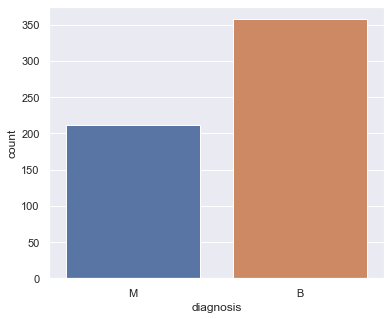

In [6]:
#graf 1
sns.set(rc={'figure.figsize':(6,5)})
sns.countplot(df['diagnosis'])

C:\Users\Lovro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='radius_mean', ylabel='count'>

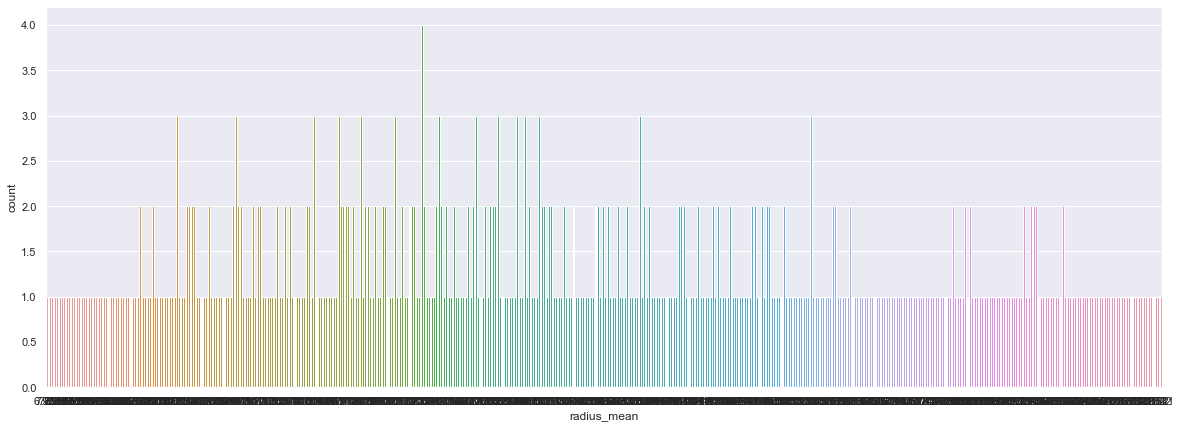

In [8]:
#graf 2
sns.set(rc={'figure.figsize':(20, 7)})
sns.countplot(df['radius_mean'])

Njihov graf 2 je prilično beskoristan, ovdje su statistička obilježja za značajku radius_mean za 'B' i 'M' iz kojih vidimo da maligni tumori imaju u prosjeku veći radius_mean sa većom standardnom devijacijom.

In [9]:
#B
df.loc[df['diagnosis']=='B', df.columns.isin(['radius_mean'])].describe()

,radius_mean
count,357.000000
mean,12.146524
std,1.780512
min,6.981000
25%,11.080000
50%,12.200000
75%,13.370000
max,17.850000


In [10]:
#M
df.loc[df['diagnosis']=='M', df.columns.isin(['radius_mean'])].describe()

,radius_mean
count,212.000000
mean,17.462830
std,3.203971
min,10.950000
25%,15.075000
50%,17.325000
75%,19.590000
max,28.110000


In [7]:
#enkodiramo oznaku sa 0 ili 1
le = LabelEncoder()
le.fit(df.loc[:, 'diagnosis'])
df.loc[:, 'diagnosis'] = le.transform(df.loc[:,'diagnosis'])

In [8]:
data = df.loc[:, ~df.columns.isin(['id', 'Unnamed: 32'])]

In [9]:
#odabirem značajke za reproduciranje njihovog grafa korelacija
corr_features= ['diagnosis']
for c in df.columns:
    if 'mean' in c:
        corr_features.append(c)

<AxesSubplot:>

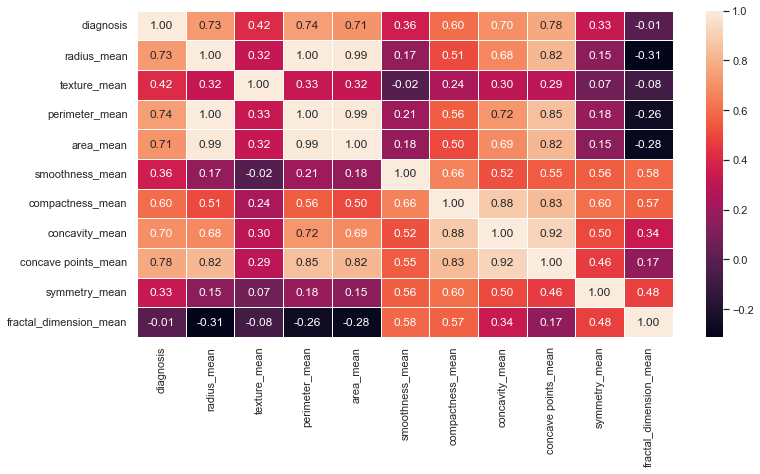

In [14]:
#graf 3
data_corr = df.loc[:, corr_features]
sns.set(rc={'figure.figsize':(12,6)})
sns.heatmap(data_corr.corr(), annot=True, fmt=".2f", linewidths=.5)

In [15]:
correlations = data.corr()
y_corr = correlations.iloc[0,:]

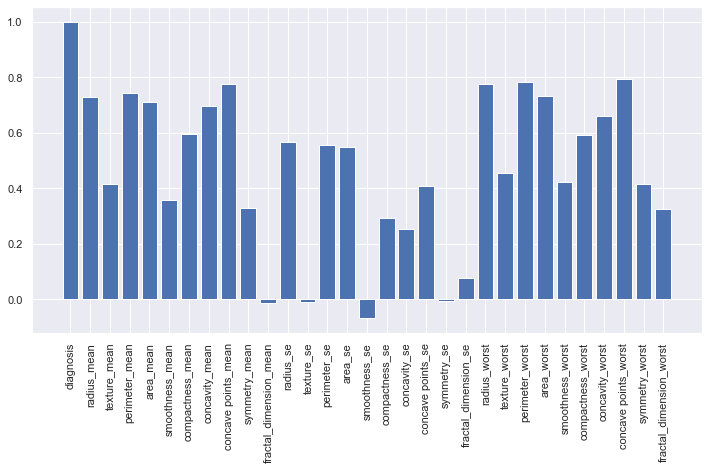

In [16]:
#graf 4
plt.bar(correlations.index.values, y_corr)
plt.xticks(rotation='vertical')
plt.show()

Selekcija značajki: izbacivanje značajki koje prema grafu 4 minimalno utjeću na oznaku dijagnoze(M/B), odnosno koje imaju najmanju korelaciju sa izlaznom varijablom.

***NADOGRADNJA***

In [109]:
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


Standardizacija značajki

In [110]:
data_std = data.copy(deep=True)
data_std.iloc[:,1:-1] = data.iloc[:,1:-1].apply(lambda x: (x-x.mean())/ x.std(), axis=0)
data_std

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,...,1.885031,-1.358098,2.301575,1.999478,1.306537,2.614365,2.107672,2.294058,2.748204,0.11890
1,1,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,...,1.804340,-0.368879,1.533776,1.888827,-0.375282,-0.430066,-0.146620,1.086129,-0.243675,0.08902
2,1,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,...,1.510541,-0.023953,1.346291,1.455004,0.526944,1.081980,0.854222,1.953282,1.151242,0.08758
3,1,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,...,-0.281217,0.133866,-0.249720,-0.549538,3.391291,3.889975,1.987839,2.173873,6.040726,0.17300
4,1,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,-0.009552,...,1.297434,-1.465481,1.337363,1.219651,0.220362,-0.313119,0.612640,0.728618,-0.867590,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,2.109139,0.720838,2.058974,2.341795,1.040926,0.218868,1.945573,2.318924,-0.312314,...,1.899514,0.117596,1.751022,2.013529,0.378033,-0.273077,0.663928,1.627719,-1.358963,0.07115
565,1,1.703356,2.083301,1.614511,1.722326,0.102368,-0.017817,0.692434,1.262558,-0.217473,...,1.535369,2.045599,1.420690,1.493644,-0.690623,-0.394473,0.236365,0.733182,-0.531387,0.06637
566,1,0.701667,2.043775,0.672084,0.577445,-0.839745,-0.038646,0.046547,0.105684,-0.808406,...,0.560868,1.373645,0.578492,0.427529,-0.808876,0.350427,0.326479,0.413705,-1.103578,0.07820
567,1,1.836725,2.334403,1.980781,1.733693,1.524426,3.269267,3.294046,2.656528,2.135315,...,1.959515,2.235958,2.301575,1.651717,1.429169,3.901415,3.194794,2.287972,1.917396,0.12400


Oni su u radu radili sa samo jednim mogućim slučajem selekcije značajki, tu ću isprobati različite selekcije značajki, zajedno
sa različitim hiperparametrima kako bi vidio koje su optimalne kombinacije, odnosno za koje slučajeve dobivam najbolju točnost.
Selekciju značajki radim pomoću sklearn-ove implementacije funkcije SelectKBest(). Funkcija f_classif, koju prosljeđujem kao parametar funkciji SelectKBest(), služi za provođenje ANOVA testa nad značajkama. Traženje optimalnih parametara radim pomoću funkcije GridSearchCV, odnosno radim prertaživanje po rešetci.

In [111]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.metrics import make_scorer
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from IPython.display import display

In [112]:
def feature_selection(X, Y, K):
    fs = SelectKBest(score_func=f_classif, k=K)
    X_selected = fs.fit_transform(X, Y)
    return X_selected

In [116]:
def ml_algorithms(X, Y):
    #Logistička regresija
    print('\033[1m' + '1.Logisticka regresija:')
    scoring = {"F1": "f1", "AUC": 'roc_auc', "Accuracy": make_scorer(accuracy_score)}
    clf = GridSearchCV(estimator=LogisticRegression(), param_grid={'C': np.linspace(0.1,1,10)}, scoring=scoring, refit="Accuracy", cv=5)
    clf.fit(X, Y)
    results = pd.DataFrame(clf.cv_results_)
    display(results.loc[:,['param_C', 'mean_test_F1', 'mean_test_AUC', 'mean_test_Accuracy']])
    print('Uz optimalan parametar: {}, dobivamo maksimalnu točnost: {:.3f}%'.format(clf.best_params_, clf.best_score_*100))
    
    #KNN
    print('\033[1m' + '2.KNN:')
    clf = GridSearchCV(estimator=KNeighborsClassifier(), param_grid={'n_neighbors': [i for i in range(2,11)], 'weights': ['uniform', 'distance'],
                                                                        'algorithm': ['auto', 'ball_tree', 'kd_tree']}, 
                                                                        scoring=scoring, refit="Accuracy", cv=5)
    clf.fit(X, Y)
    results = pd.DataFrame(clf.cv_results_)
    display(results.loc[:,['param_n_neighbors', 'param_weights', 'param_algorithm', 'mean_test_F1', 'mean_test_AUC', 'mean_test_Accuracy']])
    print('Uz optimalan parametar: {}, dobivamo maksimalnu točnost: {:.3f}%'.format(clf.best_params_, clf.best_score_*100))

    #DecisionTree
    print('\033[1m' + '3.Decision Tree:')
    params = {'criterion':['gini','entropy'],'max_depth':[2,3,4,5,6,7,8,9,10,11,12,15]}
    clf = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=params, scoring=scoring, refit="Accuracy", cv=5)
    clf.fit(X, Y)
    results = pd.DataFrame(clf.cv_results_)
    display(results.loc[:,['param_criterion', 'param_max_depth', 'mean_test_F1', 'mean_test_AUC', 'mean_test_Accuracy']])
    print('Uz optimalan parametar: {}, dobivamo maksimalnu točnost: {:.3f}%'.format(clf.best_params_, clf.best_score_*100))

    #NaiveBayes
    print('\033[1m' + '4.Naive Bayes:')
    clf = GridSearchCV(estimator=GaussianNB(), param_grid={}, scoring=scoring, refit="Accuracy", cv=5)
    clf.fit(X, Y)
    results = pd.DataFrame(clf.cv_results_)
    display(results.loc[:,['mean_test_F1', 'mean_test_AUC', 'mean_test_Accuracy']])
    print('\033[0m' + 'Srednja točnost dobivena unakrsnom validacijom: {:.3f}%'.format(clf.best_score_*100))

    #Random Forest
    print('\033[1m' + '5.Random Forest:')
    params = {'n_estimators': [i for i in range(92,110,2)], 'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12]}
    clf = GridSearchCV(estimator=RandomForestClassifier(), param_grid=params, scoring=scoring, refit="Accuracy", cv=5)
    clf.fit(X, Y)
    results = pd.DataFrame(clf.cv_results_)
    display(results.loc[:,['param_n_estimators', 'param_criterion', 'param_max_depth', 'mean_test_F1', 'mean_test_AUC', 'mean_test_Accuracy']])
    print('Uz optimalan parametar: {}, dobivamo maksimalnu točnost: {:.3f}%'.format(clf.best_params_, clf.best_score_*100))

    #SVM
    print('\033[1m' + '6.SVM:')
    params = {'C': [0.01, 0.1, 1, 9, 10, 11], 'kernel':['rbf','linear', 'poly'], 'degree': [2,3,4], 'gamma':[0.01, 0.1, 1, 10, 100]}
    clf = GridSearchCV(estimator=SVC(), param_grid=params, scoring=scoring, refit="Accuracy", cv=5)
    clf.fit(X, Y)
    results = pd.DataFrame(clf.cv_results_)
    display(results.loc[:,['param_C', 'param_kernel', 'param_degree', 'mean_test_F1', 'mean_test_AUC', 'mean_test_Accuracy']])
    print('Uz optimalan parametar: {}, dobivamo maksimalnu točnost: {:.3f}%'.format(clf.best_params_, clf.best_score_*100))

    #xgboost
    print('\033[1m' + '7.XGBClassifier:')
    xgbc = XGBClassifier(objective='binary:logistic', booster='gbtree', eval_metric='auc', tree_method='hist', grow_policy='lossguide', use_label_encoder=False)
    params = {'learning_rate': [0.01, 0.05, 0.1], 'n_estimators':[100, 200, 300, 400], 'max_depth': [2,3,4,5,6]}
    clf = GridSearchCV(estimator=xgbc, param_grid=params, scoring=scoring, refit="Accuracy", cv=5)
    clf.fit(X, Y)
    results = pd.DataFrame(clf.cv_results_)
    display(results.loc[:,['param_learning_rate', 'param_n_estimators', 'param_max_depth', 'mean_test_F1', 'mean_test_AUC', 'mean_test_Accuracy']])
    print('Uz optimalan parametar: {}, dobivamo maksimalnu točnost: {:.3f}%'.format(clf.best_params_, clf.best_score_*100))
    
    #AdaBoost classifier
    print('\033[1m' + '8.AdaBoostClassifier:')
    params = {'n_estimators':[100, 150, 200, 250], 'learning_rate':[0.5, 1.0, 1.5]}
    clf = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=params, scoring=scoring, refit="Accuracy", cv=5)
    clf.fit(X, Y)
    results = pd.DataFrame(clf.cv_results_)
    display(results.loc[:,['param_n_estimators', 'param_learning_rate', 'mean_test_F1', 'mean_test_AUC', 'mean_test_Accuracy']])
    print('Uz optimalan parametar: {}, dobivamo maksimalnu točnost: {:.3f}%'.format(clf.best_params_, clf.best_score_*100))

In [117]:
X = np.copy(data_std.loc[:, ~data_std.columns.isin(['diagnosis'])])
Y = np.copy(data_std.loc[:, 'diagnosis'])

In [118]:
X_selected = feature_selection(X, Y, K=30)
ml_algorithms(X_selected, Y)

1.Logisticka regresija:


,param_C,mean_test_F1,mean_test_AUC,mean_test_Accuracy
0,0.1,0.966146,0.995320,0.975408
1,0.2,0.976016,0.995583,0.982441
2,0.3,0.973487,0.995715,0.980686
3,0.4,0.971190,0.995846,0.978932
4,0.5,0.971190,0.995582,0.978932
5,0.6,0.971190,0.995516,0.978932
6,0.7,0.973598,0.995450,0.980686
7,0.8,0.973598,0.995450,0.980686
8,0.9,0.973598,0.995384,0.980686
9,1.0,0.969055,0.995252,0.977177


Uz optimalan parametar: {'C': 0.2}, dobivamo maksimalnu točnost: 98.244%
2.KNN:


,param_n_neighbors,param_weights,param_algorithm,mean_test_F1,mean_test_AUC,mean_test_Accuracy
0,2,uniform,auto,0.932080,0.972487,0.952538
1,2,distance,auto,0.931268,0.972560,0.949014
2,3,uniform,auto,0.939844,0.982526,0.956016
3,3,distance,auto,0.939844,0.982719,0.956016
4,4,uniform,auto,0.945823,0.985203,0.961310
5,4,distance,auto,0.945033,0.985434,0.959525
6,5,uniform,auto,0.949619,0.986619,0.963080
7,5,distance,auto,0.949619,0.987146,0.963080
8,6,uniform,auto,0.956000,0.991567,0.968374
9,6,distance,auto,0.956713,0.991398,0.968359


Uz optimalan parametar: {'algorithm': 'auto', 'n_neighbors': 7, 'weights': 'uniform'}, dobivamo maksimalnu točnost: 97.013%
3.Decision Tree:


,param_criterion,param_max_depth,mean_test_F1,mean_test_AUC,mean_test_Accuracy
0,gini,2,0.901157,0.929081,0.927961
1,gini,3,0.888982,0.905416,0.917358
2,gini,4,0.888736,0.911099,0.917373
3,gini,5,0.900219,0.917766,0.924406
4,gini,6,0.899712,0.915580,0.924406
5,gini,7,0.894374,0.918673,0.919127
6,gini,8,0.896568,0.919397,0.920882
7,gini,9,0.902819,0.923881,0.926161
8,gini,10,0.892410,0.916878,0.917373
9,gini,11,0.888313,0.914080,0.913849


Uz optimalan parametar: {'criterion': 'entropy', 'max_depth': 4}, dobivamo maksimalnu točnost: 94.377%
4.Naive Bayes:


,mean_test_F1,mean_test_AUC,mean_test_Accuracy
0,0.902909,0.983923,0.92793


Srednja točnost dobivena unakrsnom validacijom: 92.793%
5.Random Forest:


,param_n_estimators,param_criterion,param_max_depth,mean_test_F1,mean_test_AUC,mean_test_Accuracy
0,92,gini,4,0.942364,0.990337,0.957848
1,94,gini,4,0.944552,0.991128,0.959587
2,96,gini,4,0.943162,0.989616,0.957833
3,98,gini,4,0.940070,0.989878,0.956078
4,100,gini,4,0.944901,0.990607,0.959603
...,...,...,...,...,...,...
157,100,entropy,12,0.947082,0.990630,0.961341
158,102,entropy,12,0.947396,0.993392,0.961357
159,104,entropy,12,0.943021,0.991065,0.957833
160,106,entropy,12,0.950828,0.989350,0.963096


Uz optimalan parametar: {'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 108}, dobivamo maksimalnu točnost: 97.013%
6.SVM:


,param_C,param_kernel,param_degree,mean_test_F1,mean_test_AUC,mean_test_Accuracy
0,0.01,rbf,2,0.000000,0.985176,0.627418
1,0.01,linear,2,0.952868,0.993934,0.966636
2,0.01,poly,2,0.000000,0.682383,0.627418
3,0.01,rbf,2,0.000000,0.983010,0.627418
4,0.01,linear,2,0.952868,0.993934,0.966636
...,...,...,...,...,...,...
265,11,linear,4,0.957488,0.990459,0.968390
266,11,poly,4,0.742102,0.825071,0.811877
267,11,rbf,4,0.000000,0.500000,0.627418
268,11,linear,4,0.957488,0.990459,0.968390


Uz optimalan parametar: {'C': 9, 'degree': 2, 'gamma': 0.01, 'kernel': 'rbf'}, dobivamo maksimalnu točnost: 98.069%
7.XGBClassifier:


,param_learning_rate,param_n_estimators,param_max_depth,mean_test_F1,mean_test_AUC,mean_test_Accuracy
0,0.01,100,2,0.924168,0.983160,0.943782
1,0.01,200,2,0.926906,0.988557,0.945536
2,0.01,300,2,0.940634,0.990597,0.956078
3,0.01,400,2,0.940695,0.992043,0.956078
4,0.01,100,3,0.940979,0.987092,0.956125
5,0.01,200,3,0.943315,0.989423,0.957864
6,0.01,300,3,0.945629,0.991457,0.959618
7,0.01,400,3,0.947769,0.992474,0.961357
8,0.01,100,4,0.943486,0.989074,0.957879
9,0.01,200,4,0.943675,0.988744,0.957864


Uz optimalan parametar: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 400}, dobivamo maksimalnu točnost: 97.715%
8.AdaBoostClassifier:


,param_n_estimators,param_learning_rate,mean_test_F1,mean_test_AUC,mean_test_Accuracy
0,100,0.5,0.952635,0.992283,0.964866
1,150,0.5,0.961844,0.992348,0.971914
2,200,0.5,0.961612,0.992677,0.971914
3,250,0.5,0.961617,0.993407,0.971914
4,100,1.0,0.964734,0.995261,0.973653
5,150,1.0,0.971483,0.995067,0.978932
6,200,1.0,0.966206,0.995062,0.975423
7,250,1.0,0.971479,0.994989,0.978932
8,100,1.5,0.954030,0.993725,0.966620
9,150,1.5,0.968846,0.995495,0.977115


Uz optimalan parametar: {'learning_rate': 1.0, 'n_estimators': 150}, dobivamo maksimalnu točnost: 97.893%


In [119]:
X_selected = feature_selection(X, Y, K=25)
ml_algorithms(X_selected, Y)

1.Logisticka regresija:


,param_C,mean_test_F1,mean_test_AUC,mean_test_Accuracy
0,0.1,0.966146,0.995386,0.975408
1,0.2,0.971080,0.995780,0.978916
2,0.3,0.973661,0.995781,0.980686
3,0.4,0.971417,0.995781,0.978932
4,0.5,0.968949,0.995781,0.977177
5,0.6,0.968949,0.995518,0.977177
6,0.7,0.968949,0.995519,0.977177
7,0.8,0.968949,0.995453,0.977177
8,0.9,0.966419,0.995388,0.975423
9,1.0,0.966419,0.995255,0.975423


Uz optimalan parametar: {'C': 0.30000000000000004}, dobivamo maksimalnu točnost: 98.069%
2.KNN:


,param_n_neighbors,param_weights,param_algorithm,mean_test_F1,mean_test_AUC,mean_test_Accuracy
0,2,uniform,auto,0.943260,0.980058,0.959571
1,2,distance,auto,0.945683,0.980128,0.959587
2,3,uniform,auto,0.950057,0.983087,0.963080
3,3,distance,auto,0.950057,0.983616,0.963080
4,4,uniform,auto,0.943259,0.986879,0.959603
5,4,distance,auto,0.954804,0.986909,0.966589
6,5,uniform,auto,0.959026,0.989313,0.970144
7,5,distance,auto,0.959026,0.989511,0.970144
8,6,uniform,auto,0.951208,0.991405,0.964850
9,6,distance,auto,0.959141,0.991406,0.970129


Uz optimalan parametar: {'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'uniform'}, dobivamo maksimalnu točnost: 97.014%
3.Decision Tree:


,param_criterion,param_max_depth,mean_test_F1,mean_test_AUC,mean_test_Accuracy
0,gini,2,0.903991,0.941184,0.929716
1,gini,3,0.894898,0.920098,0.920866
2,gini,4,0.908720,0.939067,0.931408
3,gini,5,0.900015,0.922495,0.924406
4,gini,6,0.907592,0.928400,0.929669
5,gini,7,0.891261,0.915867,0.917373
6,gini,8,0.893618,0.918917,0.917342
7,gini,9,0.887494,0.913163,0.913849
8,gini,10,0.906899,0.928207,0.927884
9,gini,11,0.896452,0.919750,0.920882


Uz optimalan parametar: {'criterion': 'entropy', 'max_depth': 4}, dobivamo maksimalnu točnost: 94.026%
4.Naive Bayes:


,mean_test_F1,mean_test_AUC,mean_test_Accuracy
0,0.902909,0.982072,0.92793


Srednja točnost dobivena unakrsnom validacijom: 92.793%
5.Random Forest:


,param_n_estimators,param_criterion,param_max_depth,mean_test_F1,mean_test_AUC,mean_test_Accuracy
0,92,gini,4,0.939819,0.990802,0.956094
1,94,gini,4,0.942311,0.991131,0.957848
2,96,gini,4,0.944883,0.991263,0.959603
3,98,gini,4,0.942719,0.992379,0.957833
4,100,gini,4,0.932192,0.990931,0.950815
...,...,...,...,...,...,...
157,100,entropy,12,0.954714,0.991394,0.966620
158,102,entropy,12,0.946794,0.992704,0.961341
159,104,entropy,12,0.951788,0.993155,0.964850
160,106,entropy,12,0.952918,0.991590,0.964850


Uz optimalan parametar: {'criterion': 'entropy', 'max_depth': 11, 'n_estimators': 98}, dobivamo maksimalnu točnost: 97.190%
6.SVM:


,param_C,param_kernel,param_degree,mean_test_F1,mean_test_AUC,mean_test_Accuracy
0,0.01,rbf,2,0.000000,0.985638,0.627418
1,0.01,linear,2,0.947752,0.994198,0.963127
2,0.01,poly,2,0.000000,0.676789,0.627418
3,0.01,rbf,2,0.000000,0.983805,0.627418
4,0.01,linear,2,0.947752,0.994198,0.963127
...,...,...,...,...,...,...
265,11,linear,4,0.954504,0.992824,0.966651
266,11,poly,4,0.747303,0.836009,0.820742
267,11,rbf,4,0.000000,0.500000,0.627418
268,11,linear,4,0.954504,0.992824,0.966651


Uz optimalan parametar: {'C': 10, 'degree': 2, 'gamma': 0.01, 'kernel': 'rbf'}, dobivamo maksimalnu točnost: 97.893%
7.XGBClassifier:


,param_learning_rate,param_n_estimators,param_max_depth,mean_test_F1,mean_test_AUC,mean_test_Accuracy
0,0.01,100,2,0.924168,0.983160,0.943782
1,0.01,200,2,0.931727,0.988557,0.949061
2,0.01,300,2,0.940634,0.990529,0.956078
3,0.01,400,2,0.940695,0.992108,0.956078
4,0.01,100,3,0.943216,0.987092,0.957879
5,0.01,200,3,0.945607,0.989389,0.959618
6,0.01,300,3,0.948136,0.991818,0.961372
7,0.01,400,3,0.950064,0.992935,0.963111
8,0.01,100,4,0.941188,0.989040,0.956109
9,0.01,200,4,0.943426,0.989468,0.957864


Uz optimalan parametar: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 400}, dobivamo maksimalnu točnost: 97.715%
8.AdaBoostClassifier:


,param_n_estimators,param_learning_rate,mean_test_F1,mean_test_AUC,mean_test_Accuracy
0,100,0.5,0.962377,0.992095,0.971899
1,150,0.5,0.959972,0.992496,0.970160
2,200,0.5,0.966257,0.994139,0.975408
3,250,0.5,0.971421,0.994863,0.978932
4,100,1.0,0.964417,0.992890,0.973638
5,150,1.0,0.966760,0.993875,0.975392
6,200,1.0,0.964133,0.995255,0.973638
7,250,1.0,0.966711,0.995585,0.975392
8,100,1.5,0.959094,0.996103,0.970098
9,150,1.5,0.964195,0.996704,0.973653


Uz optimalan parametar: {'learning_rate': 1.5, 'n_estimators': 200}, dobivamo maksimalnu točnost: 98.067%


In [122]:
X_selected = feature_selection(X, Y, K=20)
ml_algorithms(X_selected, Y)

1.Logisticka regresija:


,param_C,mean_test_F1,mean_test_AUC,mean_test_Accuracy
0,0.1,0.968615,0.994396,0.977162
1,0.2,0.973491,0.994725,0.980671
2,0.3,0.973491,0.995122,0.980671
3,0.4,0.973491,0.995056,0.980686
4,0.5,0.971138,0.994925,0.978932
5,0.6,0.971138,0.994859,0.978932
6,0.7,0.971308,0.994859,0.978932
7,0.8,0.971308,0.994859,0.978932
8,0.9,0.971308,0.994793,0.978932
9,1.0,0.969065,0.994793,0.977177


Uz optimalan parametar: {'C': 0.4}, dobivamo maksimalnu točnost: 98.069%
2.KNN:


,param_n_neighbors,param_weights,param_algorithm,mean_test_F1,mean_test_AUC,mean_test_Accuracy
0,2,uniform,auto,0.940906,0.978912,0.957817
1,2,distance,auto,0.943171,0.978652,0.957848
2,3,uniform,auto,0.949769,0.987506,0.963096
3,3,distance,auto,0.949769,0.987538,0.963096
4,4,uniform,auto,0.941331,0.991435,0.957817
5,4,distance,auto,0.957345,0.991405,0.968359
6,5,uniform,auto,0.954192,0.991668,0.966620
7,5,distance,auto,0.954192,0.991833,0.966620
8,6,uniform,auto,0.941629,0.990645,0.957848
9,6,distance,auto,0.952362,0.991305,0.964835


Uz optimalan parametar: {'algorithm': 'auto', 'n_neighbors': 4, 'weights': 'distance'}, dobivamo maksimalnu točnost: 96.836%
3.Decision Tree:


,param_criterion,param_max_depth,mean_test_F1,mean_test_AUC,mean_test_Accuracy
0,gini,2,0.903991,0.941184,0.929716
1,gini,3,0.907618,0.934314,0.931424
2,gini,4,0.917213,0.936876,0.938472
3,gini,5,0.906303,0.929690,0.929731
4,gini,6,0.905710,0.929394,0.927946
5,gini,7,0.902741,0.925441,0.926207
6,gini,8,0.910513,0.932094,0.931486
7,gini,9,0.905540,0.927329,0.927961
8,gini,10,0.903432,0.925885,0.926176
9,gini,11,0.898794,0.922095,0.922698


Uz optimalan parametar: {'criterion': 'entropy', 'max_depth': 5}, dobivamo maksimalnu točnost: 94.026%
4.Naive Bayes:


,mean_test_F1,mean_test_AUC,mean_test_Accuracy
0,0.918315,0.98405,0.940258


Srednja točnost dobivena unakrsnom validacijom: 94.026%
5.Random Forest:


,param_n_estimators,param_criterion,param_max_depth,mean_test_F1,mean_test_AUC,mean_test_Accuracy
0,92,gini,4,0.941997,0.990630,0.957848
1,94,gini,4,0.949710,0.991064,0.963127
2,96,gini,4,0.940070,0.990402,0.956078
3,98,gini,4,0.945280,0.991587,0.959603
4,100,gini,4,0.942597,0.991521,0.957833
...,...,...,...,...,...,...
157,100,entropy,12,0.959376,0.990698,0.970129
158,102,entropy,12,0.950429,0.991456,0.963096
159,104,entropy,12,0.961897,0.991504,0.971883
160,106,entropy,12,0.954592,0.993030,0.966636


Uz optimalan parametar: {'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 104}, dobivamo maksimalnu točnost: 97.365%
6.SVM:


,param_C,param_kernel,param_degree,mean_test_F1,mean_test_AUC,mean_test_Accuracy
0,0.01,rbf,2,0.000000,0.989072,0.627418
1,0.01,linear,2,0.953136,0.993800,0.966636
2,0.01,poly,2,0.000000,0.675556,0.627418
3,0.01,rbf,2,0.000000,0.986698,0.627418
4,0.01,linear,2,0.953136,0.993800,0.966636
...,...,...,...,...,...,...
265,11,linear,4,0.952524,0.992700,0.964897
266,11,poly,4,0.717621,0.788555,0.801382
267,11,rbf,4,0.000000,0.502778,0.627418
268,11,linear,4,0.952524,0.992700,0.964897


Uz optimalan parametar: {'C': 9, 'degree': 2, 'gamma': 0.01, 'kernel': 'rbf'}, dobivamo maksimalnu točnost: 98.069%
7.XGBClassifier:


,param_learning_rate,param_n_estimators,param_max_depth,mean_test_F1,mean_test_AUC,mean_test_Accuracy
0,0.01,100,2,0.924168,0.983160,0.943782
1,0.01,200,2,0.931727,0.988491,0.949061
2,0.01,300,2,0.940634,0.990331,0.956078
3,0.01,400,2,0.940695,0.992043,0.956078
4,0.01,100,3,0.942859,0.987092,0.957879
5,0.01,200,3,0.943315,0.989389,0.957864
6,0.01,300,3,0.945629,0.991819,0.959618
7,0.01,400,3,0.947769,0.993527,0.961357
8,0.01,100,4,0.934250,0.989368,0.950831
9,0.01,200,4,0.940776,0.989270,0.956109


Uz optimalan parametar: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}, dobivamo maksimalnu točnost: 97.539%
8.AdaBoostClassifier:


,param_n_estimators,param_learning_rate,mean_test_F1,mean_test_AUC,mean_test_Accuracy
0,100,0.5,0.948162,0.991428,0.961341
1,150,0.5,0.955062,0.992487,0.966636
2,200,0.5,0.962238,0.993475,0.971899
3,250,0.5,0.959713,0.994135,0.970144
4,100,1.0,0.955426,0.992226,0.966636
5,150,1.0,0.962120,0.994064,0.971914
6,200,1.0,0.962292,0.993673,0.971899
7,250,1.0,0.966776,0.993674,0.975392
8,100,1.5,0.964470,0.994329,0.973653
9,150,1.5,0.959827,0.993679,0.970144


Uz optimalan parametar: {'learning_rate': 1.0, 'n_estimators': 250}, dobivamo maksimalnu točnost: 97.539%
